In [1]:
import os
import pandas as pd
import numpy as np

In [51]:
os.getcwd()

'/Users/prichakrabarti/Desktop'

In [59]:
with open(r'/Users/prichakrabarti/Desktop/folder/imdb_old.txt', "r") as infile, \
open (r'/Users/prichakrabarti/Desktop/folder/imdb_new.txt', "w") as outfile:
    data = infile.read()
    data = data.replace('"', '')
    outfile.write(data)

In [138]:
df = pd.read_csv("folder/imdb_new.txt",delimiter="\t", names = ["Review", "Label"] )

In [139]:
df.shape

(1000, 2)

In [140]:
df.head()

,Review,Label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [141]:
#Evaluate the target variable
df["Label"].value_counts()

1    500
0    500
Name: Label, dtype: int64

In [142]:
#Balanced dataset - no class imbalance 

In [143]:
text = df["Review"]

In [144]:
import re
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
wnl= WordNetLemmatizer()
#.lemmatize(text, pos='v'))

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    #Lemmetization
    lem_tokens = [wnl.lemmatize(word, pos="v") for word in filtered_tokens]
    # re-create document from filtered tokens
    doc = ' '.join(lem_tokens)
    return doc

In [145]:
normalize_corpus = np.vectorize(normalize_document)

In [146]:
y = df["Label"]

In [147]:
norm_corpus = normalize_corpus(text)

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [149]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(norm_corpus, y, test_size=0.3, random_state= 42)

In [150]:
X_train = cv.fit_transform(X_train)
X_test= cv.transform(X_test)

In [151]:
X_train.shape

(700, 2158)

In [152]:
X_test.shape

(300, 2158)

In [153]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
matrix = pd.DataFrame(X_train.toarray(), columns=vocab)

In [154]:
matrix.head()

,aailiyah,abandon,ability,abroad,absolutely,abstruse,abysmal,accent,acclaim,accolades,...,yes,yet,youd,youdo,young,youre,yun,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
from sklearn.naive_bayes import MultinomialNB

In [156]:
nb = MultinomialNB()

In [157]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [158]:
y_pred = nb.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score

In [160]:
accuracy_score(y_test, y_pred)

0.8066666666666666

In [161]:
from sklearn.svm import SVC

In [162]:
svc = SVC(kernel="linear")

In [163]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [164]:
y_pred_svc= svc.predict(X_test)

In [165]:
accuracy_score(y_test, y_pred_svc)

0.75

In [166]:
from xgboost import XGBClassifier

In [167]:
xgb = XGBClassifier()

In [168]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [169]:
y_pred_xgb= xgb.predict(X_test)

In [170]:
accuracy_score(y_test, y_pred_xgb)

0.68

In [171]:
y_pred_train_nb= nb.predict(X_train)

In [172]:
accuracy_score(y_train, y_pred_train_nb)

0.9628571428571429

In [173]:
#Training accuracy is 97% and the test set accuracy is 81% - we can be fairly confident of no overfitting

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [175]:
tf = TfidfVectorizer()

In [176]:
X_train, X_test, y_train, y_test = tts(text, y, test_size= 0.3, random_state= 42)

In [177]:
X_tf_train = tf.fit_transform(X_train)

In [178]:
X_tf_test = tf.transform(X_test)

In [179]:
nb.fit(X_tf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [180]:
y_pred_tf= nb.predict(X_tf_test)

In [181]:
accuracy_score(y_test, y_pred_tf)

0.7933333333333333

In [182]:
bv = CountVectorizer(ngram_range=(2,2))

In [183]:
X_train_bigram= bv.fit_transform(X_train)

In [184]:
X_test_bigram= bv.transform(X_test)

In [185]:
nb.fit(X_train_bigram, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [186]:
y_pred_bi= nb.predict(X_test_bigram)

In [187]:
accuracy_score(y_test, y_pred_bi)

0.6933333333333334

In [190]:
#Implement an LSA model for vectorization - to reduce our dimensions

In [192]:
from sklearn.decomposition import TruncatedSVD

In [286]:
svd_model = TruncatedSVD(n_components=700, algorithm='randomized', n_iter=100, random_state=122)

In [287]:
X= tf.fit_transform(norm_corpus)

In [288]:
svd_matrix= svd_model.fit_transform(X)

In [289]:
len(svd_model.components_)

700

In [290]:
# terms = tf.get_feature_names()

# for i, comp in enumerate(svd_model.components_):
#     terms_comp = zip(terms, comp)
#     sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
#     print("Topic "+str(i)+": ")
#     for t in sorted_terms:
#         print(t[0])
#     print(" ")

In [291]:
X_train, X_test = tts(svd_matrix, test_size=0.3, random_state= 42)

In [292]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [293]:
svd_pred= svc.predict(X_test)

In [294]:
accuracy_score(y_test, svd_pred)

0.7866666666666666

In [295]:
from sklearn.linear_model import LogisticRegression

In [296]:
logreg= LogisticRegression()

In [297]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [298]:
y_logreg= logreg.predict(X_test)

In [299]:
accuracy_score(y_test, y_logreg)

0.7866666666666666

In [300]:
len(norm_corpus)

1000

In [ ]:
#SVD is underperforming because here each record is a single sentence- it works better when its a group of sentences
#either a group of sentences or the entire corpus is one record- then SVD works well
#So our ML algorithms are giving us a max of 81% accuracy 

In [301]:
#Now we will implement this using Deep Learning

from keras.models import Sequential

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [303]:
from keras import layers

In [307]:
X_train.shape[1]

700

In [329]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [330]:
#Using a tfidf vectorized corpus
input_dim = X_train.shape[1]

In [331]:
model = Sequential()

In [332]:
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
#now output layer
model.add(layers.Dense(2, activation="softmax")) #2 layers because 2 classes, if 1 then sigmoid- binary classification

In [333]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [334]:
#if you want to use categorical you can but you need to do to_categorical on your y variable
#to avoid this we use binary cross entropy

In [347]:
history= model.fit(X_train, y_train_cat, epochs=100, validation_split=0.15, batch_size=10)

Train on 595 samples, validate on 105 samples
Epoch 1/100
595/595 [==============================] - 0s 103us/step - loss: 0.0096 - acc: 0.9983 - val_loss: 0.5272 - val_acc: 0.8190
Epoch 2/100
595/595 [==============================] - 0s 122us/step - loss: 0.0092 - acc: 0.9966 - val_loss: 0.5357 - val_acc: 0.8190
Epoch 3/100
595/595 [==============================] - 0s 120us/step - loss: 0.0102 - acc: 0.9983 - val_loss: 0.5334 - val_acc: 0.8286
Epoch 4/100
595/595 [==============================] - 0s 94us/step - loss: 0.0091 - acc: 0.9983 - val_loss: 0.5394 - val_acc: 0.8190
Epoch 5/100
595/595 [==============================] - 0s 104us/step - loss: 0.0089 - acc: 0.9983 - val_loss: 0.5434 - val_acc: 0.8190
Epoch 6/100
595/595 [==============================] - 0s 108us/step - loss: 0.0085 - acc: 0.9983 - val_loss: 0.5472 - val_acc: 0.8190
Epoch 7/100
595/595 [==============================] - 0s 103us/step - loss: 0.0088 - acc: 0.9966 - val_loss: 0.5543 - val_acc: 0.8190
Epoch 8/10

595/595 [==============================] - 0s 92us/step - loss: 0.0068 - acc: 0.9966 - val_loss: 0.7140 - val_acc: 0.8286
Epoch 62/100
595/595 [==============================] - 0s 93us/step - loss: 0.0046 - acc: 0.9983 - val_loss: 0.7208 - val_acc: 0.8286
Epoch 63/100
595/595 [==============================] - 0s 96us/step - loss: 0.0051 - acc: 0.9983 - val_loss: 0.7139 - val_acc: 0.8190
Epoch 64/100
595/595 [==============================] - 0s 87us/step - loss: 0.0052 - acc: 0.9983 - val_loss: 0.7158 - val_acc: 0.8190
Epoch 65/100
595/595 [==============================] - 0s 91us/step - loss: 0.0050 - acc: 0.9983 - val_loss: 0.7139 - val_acc: 0.8190
Epoch 66/100
595/595 [==============================] - 0s 93us/step - loss: 0.0058 - acc: 0.9983 - val_loss: 0.7180 - val_acc: 0.8190
Epoch 67/100
595/595 [==============================] - 0s 92us/step - loss: 0.0047 - acc: 0.9983 - val_loss: 0.7211 - val_acc: 0.8190
Epoch 68/100
595/595 [==============================] - 0s 97us/step

In [348]:
loss, accuracy = model.evaluate(X_train, y_train_cat, verbose=False)
print ("Training Accuracy:",accuracy)
print ("Training Loss:", loss)

Training Accuracy: 0.97
Training Loss: 0.12156303958967328


In [384]:
loss_test, accuracy_test = model.evaluate(X_test, y_test_cat, verbose=False)

In [350]:
print ("Testing Accuracy:",accuracy_test)
print ("Testing Loss:", loss_test)

Testing Accuracy: 0.97
Testing Loss: 0.12156303958967328


In [351]:
#Target always needs to be transformed via to_categorical 
#If the output class is 1, use signmoid instead of softmax

In [352]:
#Graphing the accuracy

In [353]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [354]:
plt.style.use("ggplot")

def plot_history(history):
    acc = history.history["acc"]
    val_acc = history.history["val_acc"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    x = range(1,len(acc)+1)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(x,acc,"b", label="Training_Acc")
    plt.plot(x,val_acc,"r", label="Validation_Acc")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(x,loss,"b", label="Training_Acc")
    plt.plot(x,val_loss,"r", label="Validation_Acc")
    plt.title("Training and Validation Loss")
    plt.legend()

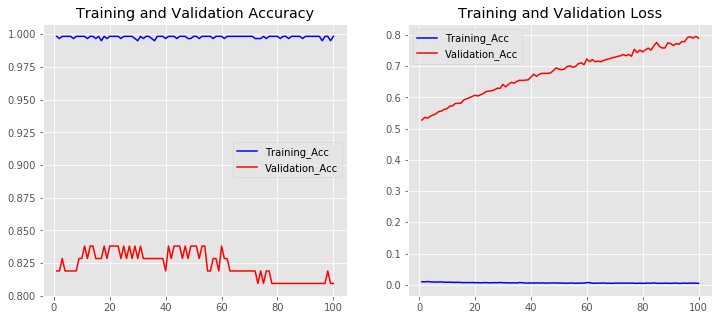

In [355]:
plot_history(history)

In [356]:
#To use word embeddings we need to go back to our original corpus
norm_corpus[1]

'sure lose flat character audience nearly half walk'

In [357]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [361]:
vocab= tf.get_feature_names()

In [362]:
len(vocab)

2649

In [363]:
vocab_size = len(vocab)

In [364]:
encoded_docs = [one_hot(d, vocab_size) for d in norm_corpus]

In [366]:
#Segway to work on keras tokenization
sentences = df["Review"].values
y = df["Label"].values

sentences_train, sentences_test, y_train, y_test = tts(sentences, y, test_size=0.25, random_state=1000)

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index)+1 # adding 1 because of reserved 0 index

print (sentences_train[2])
print (X_train[2])

It is a really good show to watch.  
[8, 5, 2, 42, 28, 124, 9, 94]


In [ ]:
#it has one hot encoded our document! Basically its an alternative to TFIDF, count vectorizer

In [369]:
X_train[0]

[64, 35, 123, 3, 315, 409]

In [370]:
sentences_train[0]

') some great music, and terrific scenery.  '

In [ ]:
#Each sentence has a different length so we need to do padding to make the final vector the same length

In [371]:
#Padding

from keras.preprocessing.sequence import pad_sequences
maxlen=100
X_train = pad_sequences(X_train, padding = "post", maxlen= maxlen)
X_test = pad_sequences(X_test, padding = "post", maxlen=maxlen)

print(X_train[0,:])

[ 64  35 123   3 315 409   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
#This is how we have created word embeddings using one hot encoding

In [372]:
#Now lets implement our final model
from keras.models import Sequential
from keras import layers
embedding_dim = 50

In [373]:
model= Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim= embedding_dim, input_length=maxlen))

In [374]:
model.add(layers.Flatten())
model.add(layers.Dense(10, activation = "relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [375]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           132500    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50010     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 182,521
Trainable params: 182,521
Non-trainable params: 0
_________________________________________________________________


In [391]:
h= model.fit(X_train, y_train, batch_size=20, epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 750 samples, validate on 250 samples
Epoch 1/20
750/750 [==============================] - 0s 130us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.6882 - val_acc: 0.6920
Epoch 2/20
750/750 [==============================] - 0s 127us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.6945 - val_acc: 0.7040
Epoch 3/20
750/750 [==============================] - 0s 121us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.7022 - val_acc: 0.7080
Epoch 4/20
750/750 [==============================] - 0s 120us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.7070 - val_acc: 0.6960
Epoch 5/20
750/750 [==============================] - 0s 122us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.7153 - val_acc: 0.7120
Epoch 6/20
750/750 [==============================] - 0s 119us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.7198 - val_acc: 0.7040
Epoch 7/20
750/750 [==============================] - 0s 126us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.7250 - val_acc: 0.6960
Epoch 8/20
750/7

In [392]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print ("Training Accuracy:",accuracy)
print ("Training Loss:", loss)

Training Accuracy: 1.0
Training Loss: 0.0005829093509043256


In [393]:
loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=False)

In [394]:
print ("Testing Accuracy:",accuracy_test)
print ("Testing Loss:", loss_test)

Testing Accuracy: 0.7080000014305114
Testing Loss: 0.7830537714958191


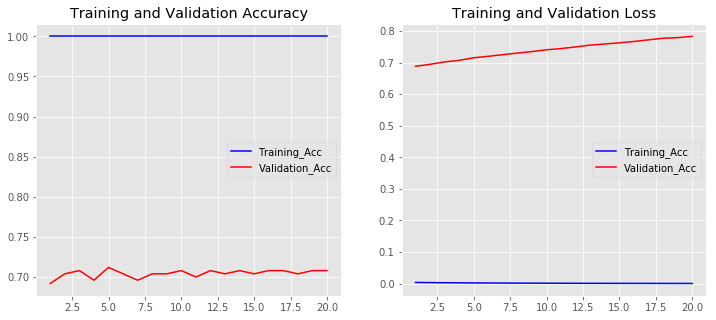

In [395]:
plot_history(h)

In [ ]:
#our deep learning ANN model demonstrates overfitting
#Almost 30% difference between training and validation accuracy!

In [ ]:
#So far of all of our models, Naive Bayes still gives us the highest accuracy of 82%

In [ ]:
#Applying a CNN model to our data

In [396]:
embedding_dim = 100

In [445]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length= maxlen))
model.add(layers.Conv1D(128, 10, activation = "relu"))
model.add(layers.Conv1D(100, 10, activation = "relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.compile(optimizer="adam", loss ="binary_crossentropy",metrics =["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          265000    
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 91, 128)           128128    
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 82, 100)           128100    
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 100)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 522,249
Trainable params: 522,249
Non-trainable params: 0
_________________________________________________________________


In [446]:
history = model.fit(X_train, y_train, epochs=10, verbose=False, validation_data= (X_test, y_test), batch_size=10)

In [447]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

In [448]:
print ("Training Accuracy:{:4f}".format(accuracy))

Training Accuracy:1.000000


In [449]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=False)

In [450]:
print ("Testing Accuracy:{:4f}".format(test_accuracy))

Testing Accuracy:0.760000


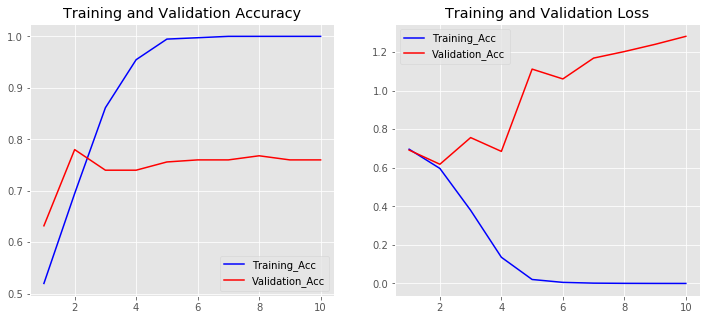

In [438]:
plot_history(history)

In [ ]:
#Naive Bayes still outperforms CNN